In [1]:
import pandas
from matplotlib import pyplot as plt
import numpy

In [2]:
df = pandas.read_csv('datasets/Suicide_Line_Listing_By_Age_Group_And_Gender_2012-2018.csv', index_col='Record Number')

In [3]:
years = []
for i in df['Year']:
    if i not in years:
        years.append(i)
years

[2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [4]:
deaths = []
for year in years:
    filt = df['Year'] == year
    df_year = df.loc[filt]
    deaths.append(len(df_year))
deaths

[115, 121, 117, 132, 126, 126, 122]

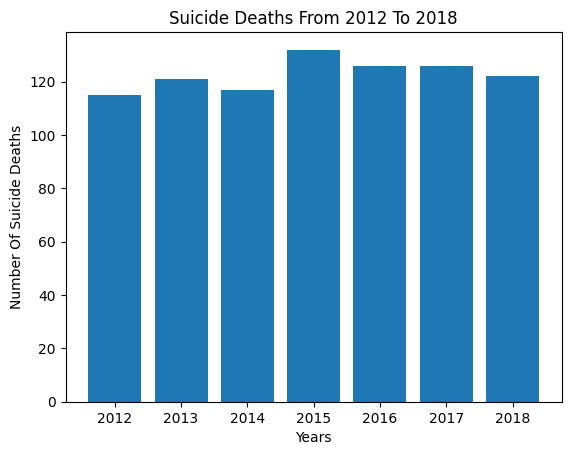

In [5]:
plt.bar(years, deaths)
plt.xlabel('Years')
plt.ylabel('Number of Suicide deaths'.title())
plt.title('Suicide deaths from 2012 to 2018'.title())
plt.show()

In [6]:
age_groups = []
for i in df['Age Group (in years)']:
    if i not in age_groups:
        age_groups.append(i)
age_groups

['≤ 29', '30-49', '50-69', '≥ 70']

In [7]:
age_group_deaths = []
for i in age_groups:
    filt = df['Age Group (in years)'] == i
    age_deaths = df.loc[filt]
    age_group_deaths.append(len(age_deaths))
age_group_deaths

[230, 328, 236, 65]

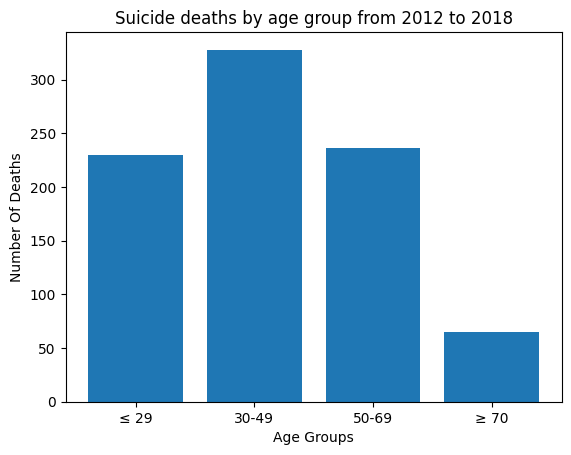

In [8]:
plt.bar(age_groups, age_group_deaths)
plt.title('Suicide deaths by age group from 2012 to 2018')
plt.xlabel('Age Groups')
plt.ylabel('Number Of Deaths')
plt.show()

In [9]:
genders = []
for i in df['Gender']:
    if i not in genders:
        genders.append(i)
genders

['FEMALE', 'MALE']

In [10]:
gender_deaths =[]
for i in genders:
    filt = df['Gender'] == i
    df_gender = df.loc[filt]
    gender_deaths.append(len(df_gender))
gender_deaths

[215, 644]

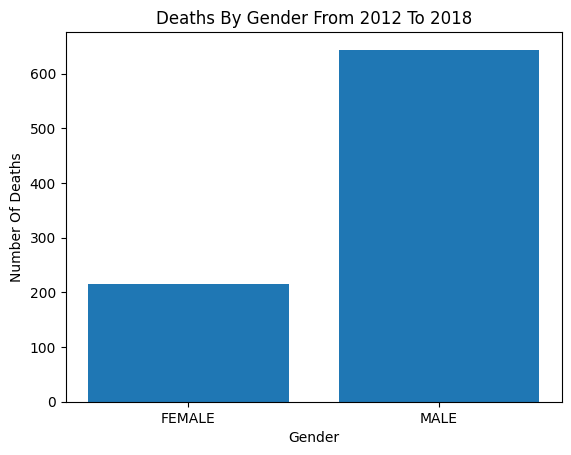

In [11]:
plt.bar(genders, gender_deaths)
plt.title('Deaths by gender from 2012 to 2018'.title())
plt.xlabel('Gender')
plt.ylabel('Number Of Deaths')
plt.show()

In [12]:
def get_by_year(year):
    if year not in years:
        raise Exception(f'{year} is not in the dataframe')
    filt = df['Year'] == year
    year_df = df.loc[filt]
    return year_df

In [13]:
def get_by_gender(gender):
    if gender not in genders:
        raise Exception(f'{gender} is not in the genders')
    filt = df['Gender'] == gender
    gender_df = df.loc[filt]
    return gender_df

In [14]:
# Function To Comparing Gender related deaths over the years
def get_by_year_and_gender(year=None, gender=None):
    if year not in years:
        raise Exception(f'{year} is not in the dataframe')
    if gender not in genders:
        raise Exception(f'{gender} is not in the genders')
    filt = df['Year'] == year
    year_df = df.loc[filt]
    filt_gender = year_df['Gender'] == gender
    year_gender = year_df.loc[filt_gender]
    return year_gender


In [15]:
#Comparing Gender related deaths over the years

male_deaths = []
female_deaths = []

for year in years:
    male_deaths.append(len(get_by_year_and_gender(year, 'MALE')))
    female_deaths.append(len(get_by_year_and_gender(year, 'FEMALE')))

In [16]:
male_deaths

[90, 86, 84, 98, 98, 94, 94]

In [17]:
female_deaths

[25, 35, 33, 34, 28, 32, 28]

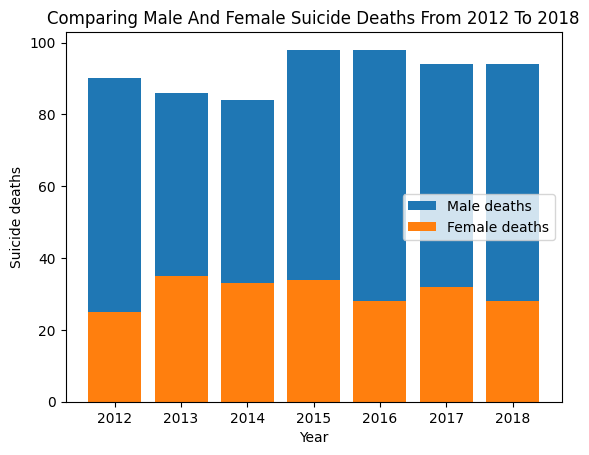

In [38]:
#Visualizing this in a bar chart
plt.bar(years, male_deaths, label='Male deaths')
plt.bar(years, female_deaths, label='Female deaths')
plt.legend(loc=7)
plt.title('Comparing male and female suicide deaths from 2012 to 2018'.title())
plt.xlabel('Year')
plt.ylabel('Suicide deaths')
plt.show()

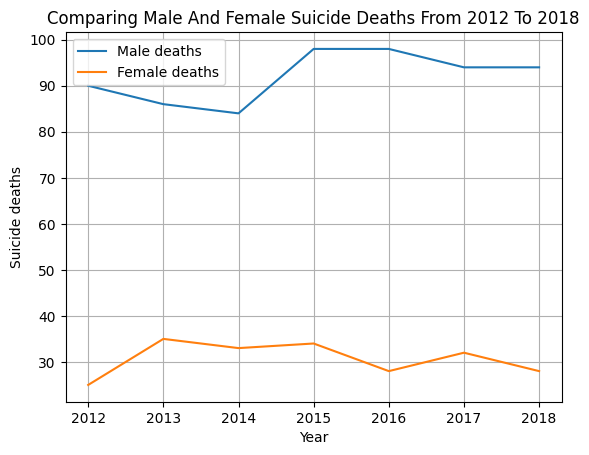

In [39]:
#Visualizing this in a plot
plt.plot(years, male_deaths, label='Male deaths')
plt.plot(years, female_deaths, label='Female deaths')
plt.grid()
plt.legend()
plt.title('Comparing male and female suicide deaths from 2012 to 2018'.title())
plt.xlabel('Year')
plt.ylabel('Suicide deaths')
plt.show()

In [20]:
#Comparing by agegroup and gender
def year_ageGroup(year, ageGroup):
    if year not in years:
        raise Exception(f'{year} is not in years')
    if ageGroup not in age_groups:
        raise Exception(f'{ageGroup} is not in age groups')
    df_year = df.loc[df['Year'] == year]
    filt_age = df_year['Age Group (in years)'] == ageGroup
    return len(df_year.loc[filt_age])

In [21]:
group_deaths = []

for year in years:
    year_group = []
    for group in age_groups:
       year_group.append(year_ageGroup(year, group))
    group_deaths.append(year_group)
group_deaths

[[26, 43, 31, 15],
 [36, 39, 38, 8],
 [31, 49, 31, 6],
 [38, 50, 36, 8],
 [34, 48, 35, 9],
 [29, 57, 30, 10],
 [36, 42, 35, 9]]

In [22]:
group_death_transp = numpy.transpose(group_deaths)
group_death_transp

array([[26, 36, 31, 38, 34, 29, 36],
       [43, 39, 49, 50, 48, 57, 42],
       [31, 38, 31, 36, 35, 30, 35],
       [15,  8,  6,  8,  9, 10,  9]])

In [23]:
age_groups

['≤ 29', '30-49', '50-69', '≥ 70']

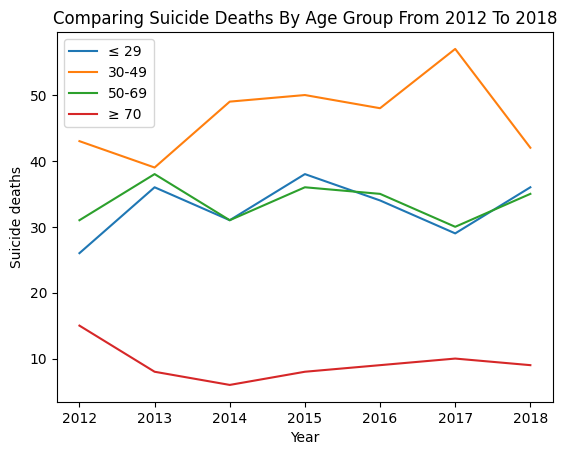

In [40]:
plt.plot(years, group_death_transp[0], label='≤ 29')
plt.plot(years, group_death_transp[1], label='30-49')
plt.plot(years, group_death_transp[2], label='50-69')
plt.plot(years, group_death_transp[3], label='≥ 70')
plt.legend()
plt.title('Comparing suicide deaths by age group from 2012 to 2018'.title())
plt.xlabel('Year')
plt.ylabel('Suicide deaths')
plt.show()